# Standard Normal Distribution

A Gaussian with zero mean and unit variance.

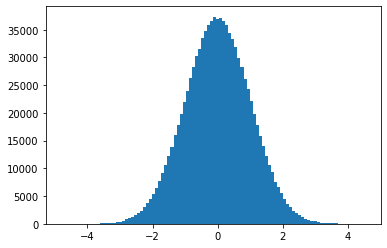

In [2]:
import numpy as np
from matplotlib import pyplot as plt
N = int(1000000)
xx = np.random.standard_normal(N)
hist_stuff = plt.hist(xx, bins=100)
plt.show()

In [3]:
print('empirical_mean = %g'% np.mean(xx)) # or xx.mean()
print('empirical_var = %g'% np.var(xx))   # or xx.var()
print('empirical_standard_deviation = %g'% np.std(xx))   # or xx.std()

empirical_mean = 0.00052161
empirical_var = 1.0027
empirical_standard_deviation = 1.00135


## Variance and Standard Deviation

The _standard deviation_ is simply the square root of the _variance_.

In [4]:
import numpy as np

a = [11,9,5,13,18,6,9,12,10,7]

mean = np.sum(a) / len(a)
sqr_dev = []
for i in a:
    sqr_dev.append(np.square(abs(mean - i)))
    
variance = np.sum(sqr_dev) / len(a)
std_dev = np.sqrt(variance)

print(f"mean: {mean}")
print(f"original: {a}")
print(f"squared deviations: {sqr_dev}")
print(f"variance: {variance}")
print(f"standard deviation: {std_dev}")
print(f"np variance: {np.var(a)}")
print(f"np standard deviation: {np.std(a)}")

mean: 10.0
original: [11, 9, 5, 13, 18, 6, 9, 12, 10, 7]
squared deviations: [1.0, 1.0, 25.0, 9.0, 64.0, 16.0, 1.0, 4.0, 0.0, 9.0]
variance: 13.0
standard deviation: 3.605551275463989
np variance: 13.0
np standard deviation: 3.605551275463989


# Shifting the mean

You can shift a distribution that has some mean _µ_ != 0 to have *µ* = 0. This is done by subtracting the mean and then dividing by the standard deviation. In the example below we call this the normalised distribution. There is also a pseudo normalised distribution where we subtract only the mean. Given that the standard deviation tends towards 

## Example 1

In [5]:
import numpy as np
from matplotlib import pyplot as plt

x = 10 + (np.random.standard_normal(1000000))
normalised_x = (x - x.mean()) / x.std()
pseudo_normalised_x = x - x.mean()

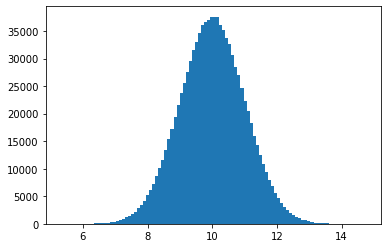

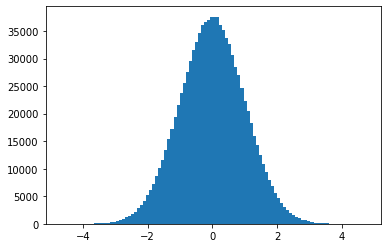

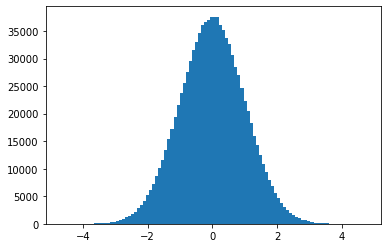

In [6]:
h = plt.hist(x, bins=100)
plt.show()

h = plt.hist(normalised_x, bins=100)
plt.show()

h = plt.hist(pseudo_normalised_x, bins=100)
plt.show()

In [7]:
print(x.sum() / len(x))
print(x.mean())
print(x.mean(axis=0))
print(x.var())
print(x.std())

print(round(normalised_x.mean(axis=0)),2)
print(normalised_x.var())
print(normalised_x.std())

print(round(pseudo_normalised_x.mean(axis=0)),2)
print(pseudo_normalised_x.var())
print(pseudo_normalised_x.std())

10.001115215623752
10.001115215623752
10.001115215623752
1.002050185863171
1.001024568061729
0.0 2
1.0
1.0
0.0 2
1.002050185863171
1.001024568061729


## Example 2

In [8]:
import numpy as np
from matplotlib import pyplot as plt

x = 4 + (np.random.standard_normal(1000000) * np.sqrt(2))

In [9]:
print(x.mean())
print(x.var())
print(x.std())

3.999675709152011
1.9937602583558784
1.4120057571964353


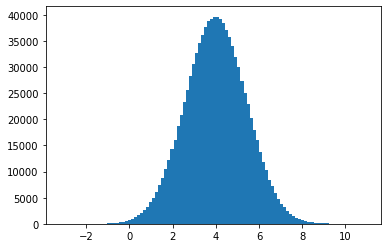

In [10]:
h = plt.hist(x, bins=100)
plt.show()

# Application

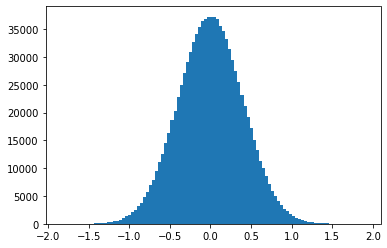

In [11]:
import numpy as np
from matplotlib import pyplot as plt
N = int(1000000)
xx = np.random.normal(size=N, scale=np.sqrt(1/(2 * np.pi)))
hist_stuff = plt.hist(xx, bins=100)
plt.show()

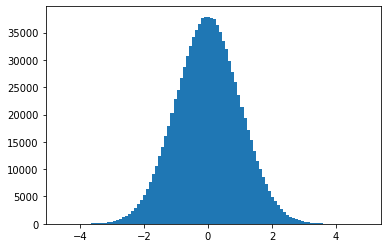

In [12]:
xx = np.random.normal(size=N,scale=1)
hist_stuff = plt.hist(xx, bins=100)
plt.show()

# Area under the curve

The area under the curve of a Probability Density Function (PDF) is called the Cumulative Distribution Function (CDF). The CDF evaluates probability as area. The CDF can be calculated as the integral of the PDF. For example for values of the continuous variable x where -∞ ≤ _x_ ≤ ∞, the probability will always be 1. However we can also calculate the probability for a discrete interval -<i>a</i> ≤ <i>x</i> ≤ <i>b</i>.

The PDF formula for the normal distribution is:

<p style="text-align: center;">f(<i>x</i>) = ( 1 / <i>σ</i>√2π ) * <i>e</i>^-( 1 / 2 * ( ( <i>x</i> - µ ) / <i>σ</i> ) ^2 )</p>

We know for the standard normal distribution µ = 0 and <i>σ</i> = 1, so the formula becomes:

<p style="text-align: center;">f(<i>x</i>) = ( 1 / √2π ) * <i>e</i>^-( <i>x</i>^2 / 2 )</p>

## By hand

The problem is that <i>e</i>^<i>x</i>^2 doesn't have an elementary anti-derivative, which means that there isn't a standard way to calculate the integral. Fortunately, the trapezium rule and Simpson's rule provide numerical approximations that are relatively straightforward to calculate.

Below is a simple trapezium rule function to help us calculate the AUC for a standard normal distribution.

In [13]:
import numpy as np

def pdf(x):
    result = (1/np.sqrt(2 * np.pi) * np.exp(-((x*x)/2)))
    return result

def trap(s, e, n):
    auc = 0
    for i in np.linspace(s,e,n+1):
        if i == s:
            auc += pdf(i)
        elif i == e:
            auc += pdf(i)
        else:
            auc += 2 * pdf(i)
    auc = (((e - s) / n) / 2) * auc
    return auc

In [14]:
print("1 sigma: " + str(trap(-1, 1, 10000)))
print("2 sigma: " + str(trap(-2, 2, 10000)))
print("3 sigma: " + str(trap(-3, 3, 10000)))

1 sigma: 0.6826894905239459
2 sigma: 0.9544997332241234
3 sigma: 0.9973002031390052


## Numpy and Scipy

Numpy provides `numpy.trapz` and scipy provides `scipy.integrate.simps`. Scipy also provides `scipy.stats.norm.pdf` which has a quick and easy way to calculate an interval. The below examples use `norm.pdf`.

## Example 1

Given a standard normal distribution, i.e. <i>μ</i> = 0, <i>σ</i> = 1, calculate the AUC where 1 ≤ <i>x</i> ≤ 2 and show it on a graph.

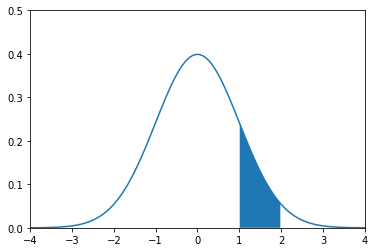

AUC = 13.243%


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x_min = 1
x_max = 2

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
probabilities = [stats.norm.pdf(i,0,1) for i in x]

line = plt.plot(x,probabilities)

plt.fill_between(x,probabilities,where = (x > x_min) & (x < x_max))
plt.axis([mu - 4*sigma, mu + 4*sigma, 0, .5])
plt.show()

probabilities_between = [probabilities[i] for i,j in enumerate(x) if j > x_min and j < x_max]
x_between = x[(x > x_min) & (x < x_max)]
auc = round(np.trapz(probabilities_between, x_between) * 100,3)


print(f'AUC = {auc}%')

## Example 2

Given a standard normal distribution, i.e. <i>μ</i> = 0, <i>σ</i> = 1, calculate the AUC where -1 ≤ <i>x</i> ≤ 2 and show it on a graph.

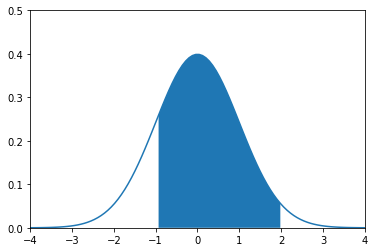

AUC = 79.958%


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x_min = -1
x_max = 2

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
probabilities = [stats.norm.pdf(i,0,1) for i in x]

line = plt.plot(x,probabilities)

plt.fill_between(x,probabilities,where = (x > x_min) & (x < x_max))
plt.axis([mu - 4*sigma, mu + 4*sigma, 0, .5])
plt.show()

probabilities_between = [probabilities[i] for i,j in enumerate(x) if j > x_min and j < x_max]
x_between = x[(x > x_min) & (x < x_max)]
auc = round(np.trapz(probabilities_between, x_between * 100),3)

print(f'AUC = {auc}%')

# Uniform vs Gaussian distributions

Uniform distributions assume a level playing field where each probability is the same. For example a fair six sided dice or a coin. The Gaussian distribution peaks at the mean and assumes the familiar bell shaped curve.

Numpy offers `numpy.random.random`, which is almost equivalent to `numpy.random.uniform`. Both offer random numbers, but `random` only offers them in the half-open interval (0.0, 1.0) (excludes 1.0) , whereas `uniform` makes it possible to specify any half-open interval.

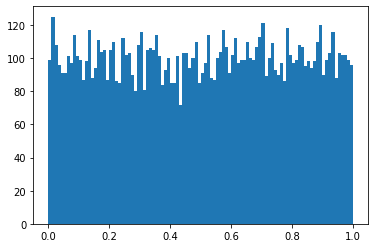

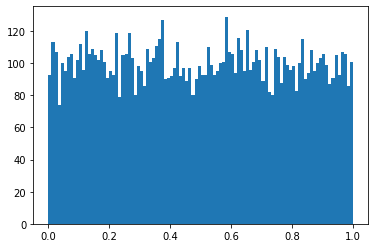

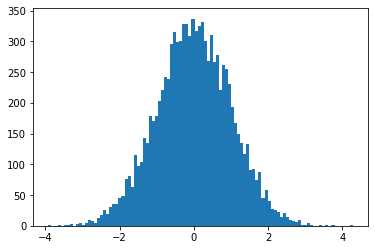

In [17]:
import numpy as np
import matplotlib.pyplot as plt

p = np.random.random(10000)
u = np.random.uniform(0,1,10000)
x = np.random.standard_normal(10000)

plt.hist(p, bins=100)
plt.show()
plt.hist(u, bins=100)
plt.show()
plt.hist(x, bins=100)
plt.show()
